In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline



Gaining some understanding of the data

In [62]:
df = pd.read_csv('./files/seattle_listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [63]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

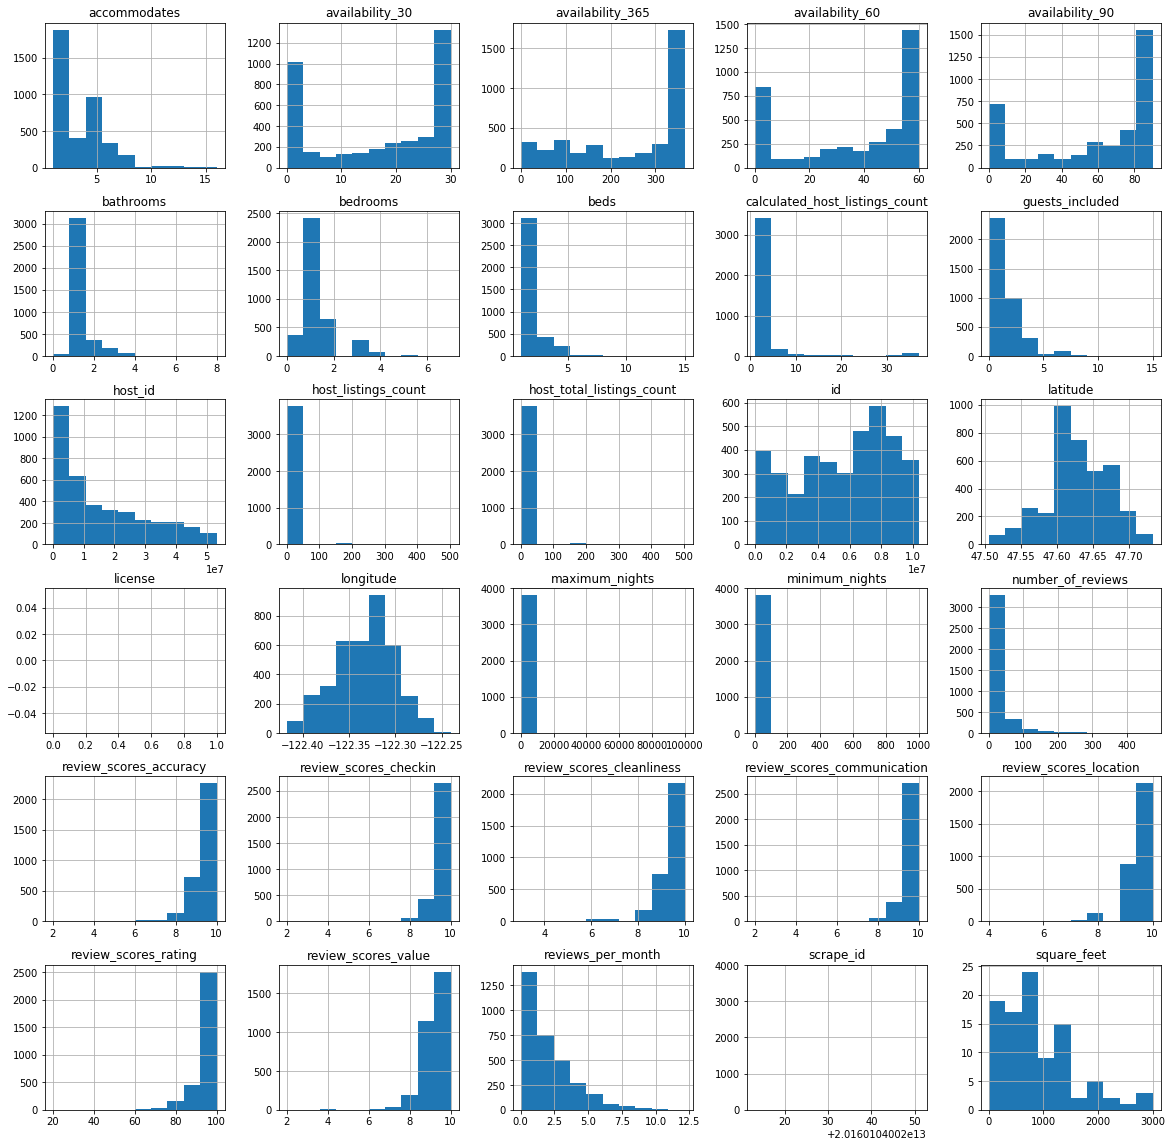

In [64]:
df.hist(figsize=(20,20));

## Question 1: Do better review scores correlate with higher prices?

In [65]:
df_q1 = df[["price", "review_scores_rating"]]

In [66]:
df_q1.head()

,price,review_scores_rating
0,$85.00,95.0
1,$150.00,96.0
2,$975.00,97.0
3,$100.00,NaN
4,$450.00,92.0


Prepare the data

In [67]:
# Drop rows without a review_score
df_q1 = df_q1.dropna(subset=["review_scores_rating"], axis =0)
df_q1.head()

,price,review_scores_rating
0,$85.00,95.0
1,$150.00,96.0
2,$975.00,97.0
4,$450.00,92.0
5,$120.00,95.0


In [68]:
# Convert dtype of price from object to float
# Remove commas and $-character first
df_q1['price'] = df_q1['price'].str.replace(',', '')
df_q1['price'] = pd.to_numeric(df_q1['price'].str.replace('$', ''))
df_q1.price.unique()

array([  85.,  150.,  975.,  450.,  120.,   80.,   60.,   90.,   95.,
         99.,  245.,  165.,  461.,  109.,   66.,  700.,  110.,  600.,
         45.,  300.,  175.,  325.,  222.,  159.,  125.,  348.,  148.,
        350.,  100.,  160.,  130.,  137.,  145.,   70.,  170.,  465.,
         59.,   47.,   55.,   65.,  149.,  129.,  126.,  115.,  225.,
         89.,  134.,   75.,  375.,   97.,  197.,  200.,  135.,  180.,
         69.,  195.,  224.,  338.,   79.,   49.,   57.,   96.,  295.,
         53.,   35.,  133.,   61.,   52.,   50.,  435.,  250.,  116.,
        275.,  199.,   39.,   98.,  190.,   68.,  349.,  105.,  196.,
        209.,  749.,  285.,  235.,  103.,  142.,  335.,  499.,  156.,
         94.,  219.,   91.,   74.,  140.,  104.,  122.,  158.,   42.,
         40.,  680.,  119.,  575.,  139.,  166.,  215.,  249.,  210.,
        439.,  155.,   54.,  254.,  310.,  490.,  144.,  445.,  395.,
         88.,  425.,  114.,  117.,  107.,   76.,  179.,   84.,  265.,
         92.,  550.,

Evaluation of the results

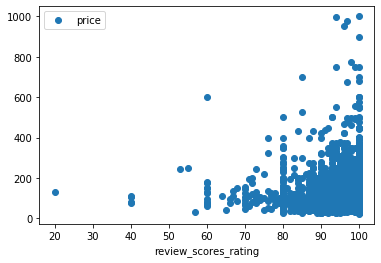

In [69]:
# There is a positive correlation between the review score and the price
df_q1.plot(x="review_scores_rating", y="price", style='o')

In [70]:
# Calculate correlation
df_q1.corr()

,price,review_scores_rating
price,1.000000,0.055551
review_scores_rating,0.055551,1.000000


### A small positive correlation between the price and the review score rating is found.

# Question 2: How is the distribution of apartment sizes in Seattle at airBnB?

In [71]:
df_q2 = df.square_feet

Text(0.5, 1.0, 'Distribution of apartment size in square feet')

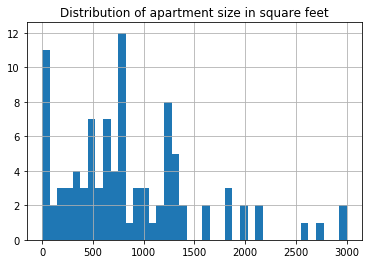

In [72]:
df_q2.hist(bins=40)
plt.title("Distribution of apartment size in square feet")

In [73]:
df_q2.describe()

count      97.000000
mean      854.618557
std       671.404893
min         0.000000
25%       420.000000
50%       750.000000
75%      1200.000000
max      3000.000000
Name: square_feet, dtype: float64

## The mean apartment size is 854 square feet with a minimal size of 420 and maximal size of 3000.

# Question 3: What kind of property type has the highest price?

In [74]:
df_q3 = df[["property_type", "price"]]
df_q3

,property_type,price
0,Apartment,$85.00
1,Apartment,$150.00
2,House,$975.00
3,Apartment,$100.00
4,House,$450.00
...,...,...
3813,House,$359.00
3814,Apartment,$79.00
3815,House,$93.00
3816,Condominium,$99.00


Prepare the data

In [75]:
# Drop all rows with a nan and convert price again to a float
df_q3.dropna()
df_q3['price'] = df_q3['price'].str.replace(',', '')
df_q3['price'] = pd.to_numeric(df_q3['price'].str.replace('$', ''))
df_q3

C:\Users\Nils\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nils\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,property_type,price
0,Apartment,85.0
1,Apartment,150.0
2,House,975.0
3,Apartment,100.0
4,House,450.0
...,...,...
3813,House,359.0
3814,Apartment,79.0
3815,House,93.0
3816,Condominium,99.0


Evaluate the results

Text(0.5, 1.0, 'Prices for Property Types')

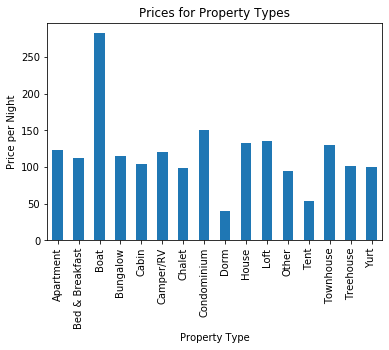

In [76]:
df_q3.groupby("property_type").price.mean().plot(kind='bar')
plt.xlabel("Property Type")
plt.ylabel("Price per Night")
plt.title("Prices for Property Types")

In [77]:
df_q3.groupby("property_type").price.mean().sort_values()

property_type
Dorm                39.500000
Tent                54.000000
Other               94.681818
Chalet              98.500000
Yurt               100.000000
Treehouse          101.000000
Cabin              104.666667
Bed & Breakfast    112.054054
Bungalow           115.615385
Camper/RV          120.461538
Apartment          122.932670
Townhouse          129.457627
House              132.351414
Loft               135.700000
Condominium        151.109890
Boat               282.375000
Name: price, dtype: float64

## The maximum price per night is made using a boat while the apartment type with the lowest price is a dorm.

# Question 4: Let's create a linear regression model for the price using the apartment size, property type, number of beds and review score to predict the price per night. What will be the most influencing factor?

Prepare the data

In [78]:
df_q4 = df[["price", "property_type", "beds", "square_feet", "review_scores_rating"]]

In [79]:
# Drop nan values in price and adjust price format
num_rows_before = len(df_q4)
df_q4 = df_q4.dropna(subset=["price"], axis = 0)
num_rows_after = len(df_q4)
df_q4['price'] = df_q4['price'].str.replace(',', '')
df_q4['price'] = pd.to_numeric(df_q4['price'].str.replace('$', ''))
print("The number of removed rows without price: ", num_rows_before-num_rows_after)

The number of removed rows without price:  0


In [80]:
# Use onehotencoding for categorial variable property type
df_q4 = pd.concat([df_q4.drop("property_type", axis=1), pd.get_dummies(df_q4["property_type"], prefix="property_type", prefix_sep='_', drop_first=True)], axis=1)
df_q4

,price,beds,square_feet,review_scores_rating,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,85.0,1.0,NaN,95.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,150.0,1.0,NaN,96.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,975.0,7.0,NaN,97.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,100.0,2.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,450.0,3.0,NaN,92.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,3.0,NaN,80.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3814,79.0,2.0,NaN,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3815,93.0,1.0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3816,99.0,1.0,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [81]:
null_beds = sum(df_q4.beds.isnull())
null_sq = sum(df_q4.square_feet.isnull())
null_scores = sum(df_q4.review_scores_rating.isnull())
print("The number of nan in column bed: ", null_beds)
print("The number of nan in column square feet: ", null_sq)
print("The number of nan in column rating score: ", null_scores)
print("Number of rows in general: ", len(df_q4))


The number of nan in column bed:  1
The number of nan in column square feet:  3721
The number of nan in column rating score:  647
Number of rows in general:  3818


While the number of nan in column bed is insignificant, the number of nans in square feet is very high. If I had done this analysis before, I would have avoided this feature, because not even 100 square feet values are available of the over 3800 entries. The number of nan in the rating score is also already quite high.

In [82]:
# Fill mean value for all other nan
fill_mean = lambda col: col.fillna(col.mean())
df_q4 = df_q4.apply(fill_mean, axis=0)

In [83]:
# Create X and y matrices
X = df_q4.drop("price", axis=1)
y = df_q4["price"]

Model the data

In [84]:
# Create train/test split and corresponding data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

In [85]:
# Create linear regression model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Evaluate the results

In [86]:
# Predict scores and compare
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train) 
test_score=r2_score(y_test, y_test_preds)
train_score=r2_score(y_train, y_train_preds)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.39136113782369275.  The rsquared on the test data was 0.3293855682876007.


### As expected, the r2 score is slightly better on the training set (0.39) compared to the test set (0.33). This suggest overfitting. 

In [87]:
df_q4.corr()

,price,beds,square_feet,review_scores_rating,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
price,1.000000,0.589306,8.408972e-02,0.050488,-0.017455,0.078404,-8.006631e-03,-0.019210,-4.867560e-03,-0.007478,0.040059,-2.244640e-02,0.044204,8.807275e-03,-0.028088,-2.968609e-02,0.002932,-8.383071e-03,-5.018070e-03
beds,0.589306,1.000000,5.760657e-02,-0.000665,-0.033349,0.020700,-1.010461e-02,-0.016921,-2.210771e-03,0.005318,-0.005910,1.258959e-01,0.170542,-7.713207e-03,-0.027881,-1.066140e-02,0.012253,-1.810259e-02,3.759632e-03
square_feet,0.084090,0.057607,1.000000e+00,0.016397,-0.021412,-0.059678,-6.854200e-17,-0.015122,-6.854200e-17,-0.027376,-0.000881,-1.186650e-17,0.044866,-5.538696e-17,-0.022252,-1.949217e-17,0.017703,-4.976215e-17,-8.389782e-18
review_scores_rating,0.050488,-0.000665,1.639694e-02,1.000000,0.013760,0.005047,2.102432e-02,0.020989,8.670207e-03,-0.041985,0.015345,-1.726396e-02,0.037552,1.290782e-02,0.018829,-1.889553e-04,0.041952,4.536686e-03,1.468367e-02
property_type_Bed & Breakfast,-0.017455,-0.033349,-2.141157e-02,0.013760,1.000000,-0.004533,-5.782183e-03,-0.007357,-5.782183e-03,-0.002265,-0.015457,-2.264688e-03,-0.090187,-1.017880e-02,-0.007531,-3.582194e-03,-0.017666,-2.774028e-03,-1.601166e-03
property_type_Boat,0.078404,0.020700,-5.967807e-02,0.005047,-0.004533,1.000000,-2.678409e-03,-0.003408,-2.678409e-03,-0.001049,-0.007160,-1.049043e-03,-0.041776,-4.714998e-03,-0.003488,-1.659335e-03,-0.008183,-1.284979e-03,-7.416883e-04
property_type_Bungalow,-0.008007,-0.010105,-6.854200e-17,0.021024,-0.005782,-0.002678,1.000000e+00,-0.004347,-3.416557e-03,-0.001338,-0.009133,-1.338151e-03,-0.053289,-6.014415e-03,-0.004450,-2.116635e-03,-0.010438,-1.639108e-03,-9.460918e-04
property_type_Cabin,-0.019210,-0.016921,-1.512220e-02,0.020989,-0.007357,-0.003408,-4.346940e-03,1.000000,-4.346940e-03,-0.001703,-0.011621,-1.702551e-03,-0.067801,-7.652236e-03,-0.005662,-2.693028e-03,-0.013281,-2.085464e-03,-1.203728e-03
property_type_Camper/RV,-0.004868,-0.002211,-6.854200e-17,0.008670,-0.005782,-0.002678,-3.416557e-03,-0.004347,1.000000e+00,-0.001338,-0.009133,-1.338151e-03,-0.053289,-6.014415e-03,-0.004450,-2.116635e-03,-0.010438,-1.639108e-03,-9.460918e-04
property_type_Chalet,-0.007478,0.005318,-2.737592e-02,-0.041985,-0.002265,-0.001049,-1.338151e-03,-0.001703,-1.338151e-03,1.000000,-0.003577,-5.241090e-04,-0.020872,-2.355645e-03,-0.001743,-8.290150e-04,-0.004088,-6.419840e-04,-3.705525e-04


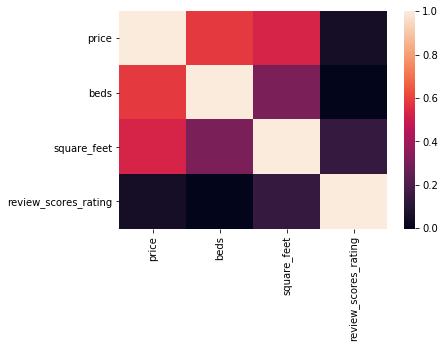

In [88]:
df["price"] = df_q4["price"]
sns.heatmap(df[["price", "property_type", "beds", "square_feet", "review_scores_rating"]].corr());

## We can see, that the strongest correlation between the price and the input features is the number of beds. Also, the apartment type does not matter that much anymore. But we should take this insight with a grain of salt, since the number of input features is small compared to the original data set.